# MutSpec12 for Human Global Tree D-loop and cancer D-loop

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Data from HumanGlobalTree:**  
(https://github.com/mitoclub/human-global-tree/blob/master/Body/2Derived/fulltreeCodons.csv)

In [4]:
df = pd.read_table(r'C:\Users\777\Downloads\fulltreeCodons.csv', sep=';')

In [5]:
df.head()

,first,second,position,ref_pos,ancestor,descendant,nuc_ref_in_ali,gene_info,gene_start,pos_in_codon,synonymous,ancestral_aa,derived_aa,note,ancestral_codon,derived_codon
0,28409,AM_PR_0048,174,150,ttTc-,ttCc-,C,D-loop_2,NaN,NaN,NaN,NaN,NaN,non-coding,NaN,NaN
1,28409,AM_PR_0048,593,522,acTc-,acAc-,A,D-loop_2,NaN,NaN,NaN,NaN,NaN,non-coding,NaN,NaN
2,28409,AM_PR_0048,5007,4840,ctAac,ctGac,G,mRNA_ND2,4469.0,3.0,synonymous,Leu,Leu,normal,ctA,ctG
3,28409,AM_PR_0048,7971,7774,ccGtc,ccRtc,G,mRNA_COX2,7585.0,1.0,non-synonymous,Val,Ambiguous,normal,Gtc,Rtc
4,28409,AM_PR_0048,8017,7820,ccCat,ccMat,C,mRNA_COX2,7585.0,2.0,non-synonymous,Pro,Ambiguous,normal,cCa,cMa


**Extract only *D-loop* and mutations *without gaps (-) and other (R, M, N, ect) bases* in context:**

In [6]:
D_loop_df = df[
    (df.ancestor.str.lower().str.fullmatch("[acgt]{5}")) &
    (df.descendant.str.lower().str.fullmatch("[acgt]{5}")) &
    (df.ancestor.str.slice(0, 2) == df.descendant.str.slice(0, 2)) &
    (df.ancestor.str.slice(3, 5) == df.descendant.str.slice(3, 5)) &
    (df.gene_info.str.startswith("D-loop"))
]

In [7]:
D_loop_df = D_loop_df.drop(['gene_start', 'pos_in_codon',
       'synonymous', 'ancestral_aa', 'derived_aa', 'note', 'ancestral_codon',
       'derived_codon'], axis=1)

In [8]:
D_loop_df.head()

,first,second,position,ref_pos,ancestor,descendant,nuc_ref_in_ali,gene_info
9,17837,EU_IT_0648,354,309,ccTcc,ccCcc,T,D-loop_2
24,29187,AM_GL_0001,16396,16128,acAgt,acGgt,G,D-loop_1
32,33133,7947,16497,16217,atCaa,atTaa,C,D-loop_1
36,8198,AF_BF_0099,16809,16518,ggTca,ggCca,T,D-loop_1
39,30275,OC_SB_0512,16575,16291,ccCac,ccTac,C,D-loop_1


**Reference for calculated *Expected Mutations* in D-loop:**

In [9]:
ref = pd.read_table(r'C:\Users\777\Downloads\ref_annot.csv', sep=',')

In [10]:
ref_D_loop = ref[ref.Type == 'D-loop'].Nuc.value_counts()

In [11]:
ref_D_loop

C    371
A    339
T    260
G    152
Name: Nuc, dtype: int64

---

In [12]:
complementator = str.maketrans("ACGT", "TGCA") #for adding heavy chain


def getMutSpec12(df):
    
    '''
    for HumanGlobalTree df
    '''
    
    # Counting observed mutations in D-loop
    observed_mut = (df.ancestor.str[2] + '>' + df.descendant.str[2]) \
    .value_counts() \
    .reset_index() \
    .rename(columns={'index':'Mut', 0: "ObsNum"})
    
    # Counting normalized/adjusted MutSpec
    observed_mut = observed_mut.sort_values("Mut")
    observed_mut["ExpNum"] = ref_D_loop.sort_index().values.repeat(3)
    observed_mut['MutSpec'] = observed_mut["ObsNum"] / observed_mut["ExpNum"]
    observed_mut["MutSpec"] = observed_mut["MutSpec"] / observed_mut["MutSpec"].sum()

    #Add heavy chain
    observed_mut["MutHeavy"] = observed_mut["Mut"].str.translate(complementator)
    
    
    return observed_mut

In [20]:
# def heavy_chain_column(df, column_name):
#     column = []
#     for i in df.Mut:
#         row = []
#         for x in i:
#             if x == 'A':
#                 row.append('T')
#             elif x == 'T':
#                 row.append('A')
#             elif x == 'G':
#                 row.append('C')
#             elif x == 'C':
#                 row.append('G')
#             else:
#                 row.append('>')
#         row = ''.join(row)
#         column.append(row)
    
#     df[column_name] = column

Variables for plots:

In [13]:
sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]

In [14]:
color_mapping12 = {
    "C>A": "deepskyblue",
    "G>T": "deepskyblue",
    "C>G": "black",
    "G>C": "black",
    "C>T": "red",
    "G>A": "red",
    "T>A": "silver",
    "A>T": "silver",
    "T>C": "yellowgreen",
    "A>G": "yellowgreen",
    "T>G": "pink",
    "A>C": "pink",
}

---

### MutSpec D-loop for *all* Human Global Tree (HGT):

In [15]:
ms12_alltree = getMutSpec12(D_loop_df)

[Text(0.5, 1.0, 'D-loop all tree')]

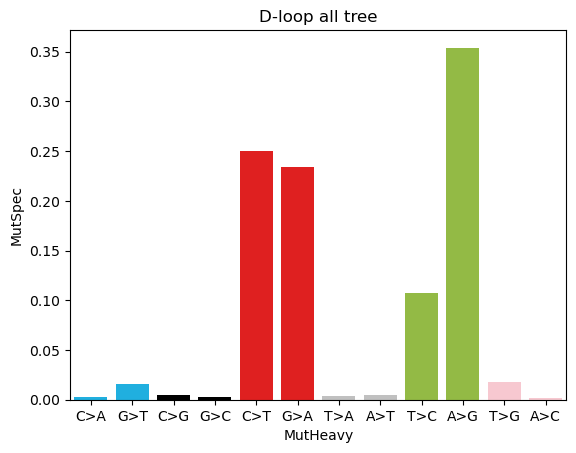

In [19]:
sns.barplot(data=ms12_alltree, x='MutHeavy', y='MutSpec', order=sbs12_ordered, palette=color_mapping12) \
    .set(title='D-loop all tree')

### MutSpec for *terminal* nodes in HGT:

In [21]:
terminal_D_loop_df = D_loop_df[D_loop_df['second'].str.match('[A-Z]')]

[Text(0.5, 1.0, 'Terminal MutSpec')]

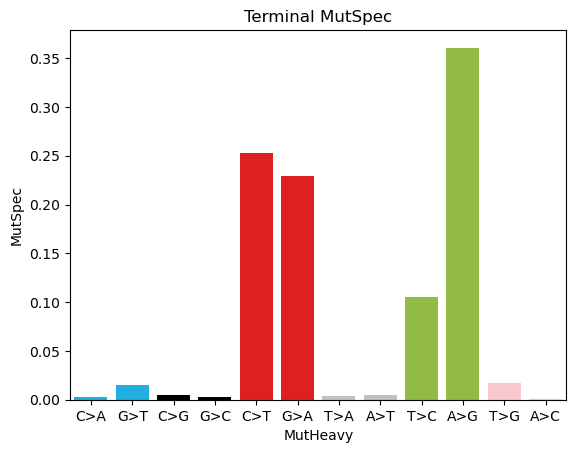

In [23]:
observed_mut_terminal = getMutSpec12(terminal_D_loop_df)
sns.barplot(data=observed_mut_terminal, x='MutHeavy', y='MutSpec', order=sbs12_ordered, palette=color_mapping12) \
    .set(title='Terminal MutSpec')

### MutSpec for *pre-terminal* nodes in HGT:

In [24]:
pre_terminals = D_loop_df[D_loop_df['second'].str.match('[A-Z]')]['first'].unique().tolist()

In [25]:
pre_terminals = list(map(str, pre_terminals))

In [26]:
pre_terminal_D_loop_df = D_loop_df[D_loop_df['second'].isin(pre_terminals)]

[Text(0.5, 1.0, 'Pre_terminal MutSpec')]

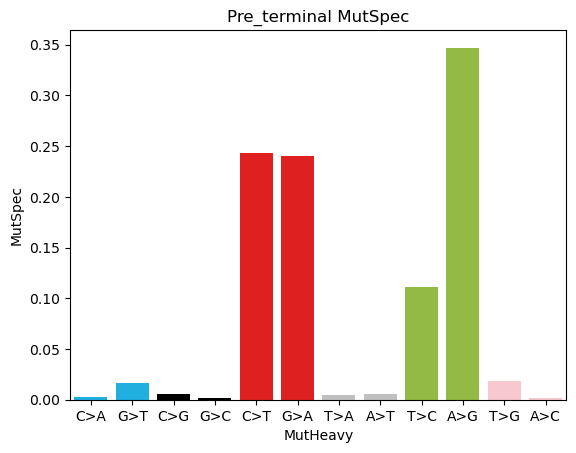

In [27]:
observed_mut_pre_terminal = getMutSpec12(pre_terminal_D_loop_df)
sns.barplot(data=observed_mut_pre_terminal, x='MutHeavy', y='MutSpec', order=sbs12_ordered, palette=color_mapping12) \
    .set(title='Pre_terminal MutSpec')

### MutSpec for *other inner* nodes in HGT:
(terminal and pre_terminal nodes excluded)

In [28]:
other_nods_D_loop_df = D_loop_df[~(D_loop_df['second'].isin(terminal_D_loop_df['second'])) & (~D_loop_df['second'].isin(pre_terminal_D_loop_df['second']))]

[Text(0.5, 1.0, 'Other inner nodes MutSpec')]

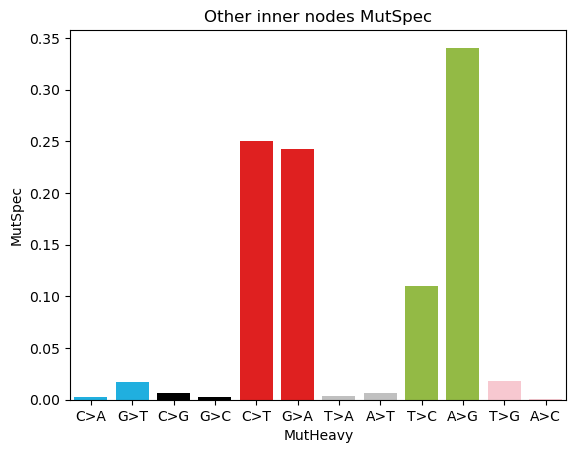

In [29]:
observed_mut_other_nods = getMutSpec12(other_nods_D_loop_df)
sns.barplot(data=observed_mut_other_nods, x='MutHeavy', y='MutSpec', order=sbs12_ordered, palette=color_mapping12) \
    .set(title='Other inner nodes MutSpec')

## Sampling/bootstrap data

[Text(0.5, 1.0, 'Number of mutations on edge'),
 Text(0.5, 0, 'Mutations on edge')]

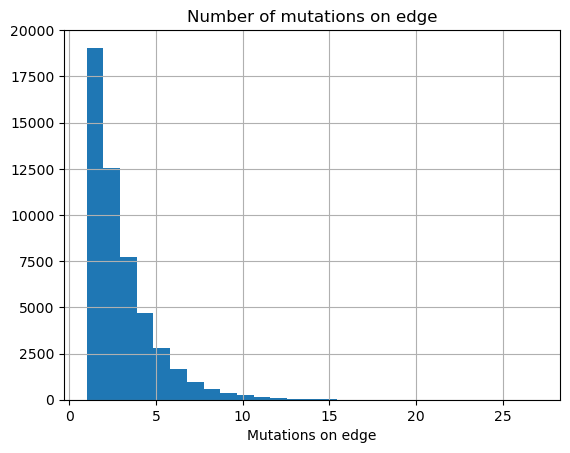

In [30]:
D_loop_df["second"].value_counts().hist(bins=27).set(title='Number of mutations on edge', xlabel='Mutations on edge')

Mostly we have less than 5 mutations on edge in D-loop  


### MutSpec for booted data all HGT:

In [32]:
sampling_ms = []
for i in range(1000): 
    smlp = D_loop_df.sample(frac=1, replace=True)
    ms = getMutSpec12(smlp)
    sampling_ms.append(ms)

In [33]:
df_sampling = pd.concat(sampling_ms)

In [34]:
df_sampling.groupby(['MutHeavy']).MutSpec.describe()

,count,mean,std,min,25%,50%,75%,max
MutHeavy,,,,,,,,
A>C,1000.0,0.001284,0.000100,0.000934,0.001216,0.001287,0.001351,0.001618
A>G,1000.0,0.354103,0.001355,0.349869,0.353234,0.354077,0.354994,0.357982
A>T,1000.0,0.005135,0.000203,0.004355,0.004995,0.005124,0.005266,0.005976
C>A,1000.0,0.002747,0.000195,0.002025,0.002617,0.002752,0.002874,0.003347
C>G,1000.0,0.005057,0.000265,0.004268,0.004887,0.005052,0.005223,0.006076
C>T,1000.0,0.250173,0.001489,0.245304,0.249240,0.250162,0.251150,0.255101
G>A,1000.0,0.234044,0.001074,0.230405,0.233327,0.234015,0.234749,0.237479
G>C,1000.0,0.002242,0.000115,0.001900,0.002167,0.002237,0.002318,0.002606
G>T,1000.0,0.015406,0.000286,0.014539,0.015217,0.015407,0.015589,0.016404


[Text(0.5, 1.0, 'MutSpec boot full tree')]

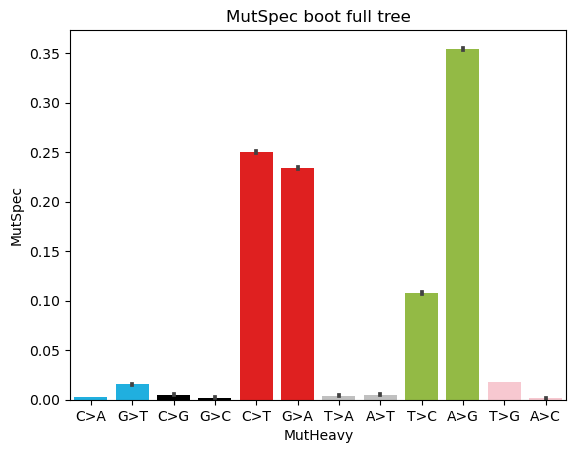

In [35]:
sns.barplot(data=df_sampling, x='MutHeavy', y='MutSpec', order=sbs12_ordered, palette=color_mapping12, ci='sd') \
    .set(title='MutSpec boot full tree')

### MutSpec for booted inner nodes in HGT:
(terminal nodes excluded)

In [36]:
df_exclude_terminal = D_loop_df[~(D_loop_df['second'].isin(terminal_D_loop_df['second']))]

In [38]:
sampling_ms_et = []
for i in range(1000):
    smlp = df_exclude_terminal.sample(frac=1, replace=True)
    ms = getMutSpec12(smlp)
    sampling_ms_et.append(ms)

In [39]:
df_sampling_et = pd.concat(sampling_ms_et)

[Text(0.5, 1.0, 'MutSpec boot exclude terminals')]

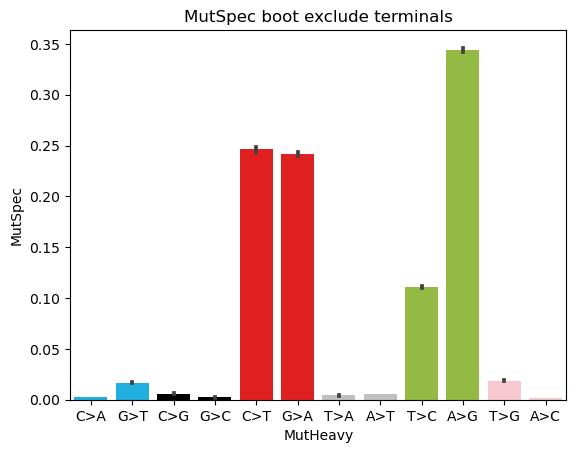

In [40]:
sns.barplot(data=df_sampling_et, x='MutHeavy', y='MutSpec', order=sbs12_ordered, palette=color_mapping12, ci='sd') \
    .set(title='MutSpec boot exclude terminals')

___

# Cancer

**Data from cancer dataset:**  
(https://github.com/mitoclub/mtdnaMutSpecOfCancers/blob/main/data/processed/mutations.csv)

In [44]:
df_canser = pd.read_csv(r'C:\Users\777\Downloads\canser_mutations.csv')

In [45]:
df_canser.head()

,tissue,TurnOverDays,tumor_var_freq,Pos,Nuc,Context,Strand,Type,GeneName,PosInGene,PosInCodon,Codon,TBSS,AltCodon,Label,Mut
0,Bladder,200.0,38.7900,2680,T,TTG,1,rRNA,RNR2,-1,-1,NaN,10487.0,NaN,0,T[T>C]G
1,Pancreas,360.0,21.0500,2680,T,TTG,1,rRNA,RNR2,-1,-1,NaN,10487.0,NaN,0,T[T>C]G
2,Bladder,200.0,10.1400,6011,T,TTA,1,CDS,COX1,108,3,CTT,426.0,CTC,2,T[T>C]A
3,Bladder,200.0,37.3900,7706,G,TGC,1,CDS,COX2,121,1,GCC,3816.0,ACC,0,T[G>A]C
4,Esophagus,11.0,0.7013,7706,G,TGC,1,CDS,COX2,121,1,GCC,3816.0,ACC,0,T[G>A]C


**Extract only D-loop and only mutations from ['Mut'] column:**

In [46]:
df_can_d_loop = df_canser[df_canser['Type'] == 'D-loop']

In [47]:
df_can_d_loop['Mut'] = df_can_d_loop['Mut'].str[2:5]

C:\Users\777\AppData\Local\Temp\ipykernel_15284\3979032511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_can_d_loop['Mut'] = df_can_d_loop['Mut'].str[2:5]


In [49]:
df_can_d_loop.head()

,tissue,TurnOverDays,tumor_var_freq,Pos,Nuc,Context,Strand,Type,GeneName,PosInGene,PosInCodon,Codon,TBSS,AltCodon,Label,Mut
19,Bladder,200.0,1.14,152,T,CTA,-1,D-loop,NaN,-1,-1,NaN,NaN,NaN,0,T>C
20,Bone/SoftTissue,5373.0,57.94,152,T,CTA,-1,D-loop,NaN,-1,-1,NaN,NaN,NaN,0,T>C
21,Breast,84.5,1.01,152,T,CTA,-1,D-loop,NaN,-1,-1,NaN,NaN,NaN,0,T>C
22,Lymphoid,30.0,1.43,152,T,CTA,-1,D-loop,NaN,-1,-1,NaN,NaN,NaN,0,T>C
23,Prostate,120.0,12.28,152,T,CTA,-1,D-loop,NaN,-1,-1,NaN,NaN,NaN,0,T>C


**Count observed mutations in D-loop in cancers in different tissues:**

In [50]:
observed_mut_can = df_can_d_loop.groupby(['tissue', 'TurnOverDays', 'Mut'], as_index=False) \
    .agg({'Pos':'count'}) \
    .rename(columns={'Pos':'ObsNum'}) \
    .sort_values('Mut')

In [51]:
observed_mut_can.tissue.value_counts()

Liver              11
Kidney             10
Stomach            10
Breast              9
Colon/Rectum        9
CNS                 8
Pancreas            8
Skin                7
Lymphoid            7
Thyroid             6
Head/Neck           6
Prostate            6
Esophagus           6
Bladder             6
Lung                5
Ovary               5
Biliary             4
Myeloid             4
Bone/SoftTissue     4
Uterus              3
Cervix              3
Name: tissue, dtype: int64

Mutations in D-loop less than 12 for each tissue  

**Count MutSpec for all tissues:**

In [54]:
observed_mut_can_all = df_can_d_loop.groupby(['Mut'], as_index=False) \
    .agg({'Pos':'count'}) \
    .rename(columns={'Pos':'ObsNum'}) \
    .sort_values('Mut')

In [55]:
expect_num = dict(ref_D_loop.sort_index())
observed_mut_can_all["ExpNum"] = observed_mut_can_all["Mut"].str[0]
observed_mut_can_all["ExpNum"] = observed_mut_can_all["ExpNum"].replace(expect_num)

observed_mut_can_all['MutSpec'] = observed_mut_can_all["ObsNum"] / observed_mut_can_all["ExpNum"]
observed_mut_can_all["MutSpec"] = observed_mut_can_all["MutSpec"] / observed_mut_can_all["MutSpec"].sum()

observed_mut_can_all["MutHeavy"] = observed_mut_can_all["Mut"].str.translate(complementator)

In [56]:
observed_mut_can_all

,Mut,ObsNum,ExpNum,MutSpec,MutHeavy
0,A>C,11,339,0.008344,T>G
1,A>G,131,339,0.099366,T>C
2,A>T,7,339,0.005310,T>A
3,C>A,42,371,0.029110,G>T
4,C>G,6,371,0.004159,G>C
5,C>T,300,371,0.207928,G>A
6,G>A,211,152,0.356947,C>T
7,G>C,7,152,0.011842,C>G
8,G>T,17,152,0.028759,C>A
9,T>A,6,260,0.005934,A>T


[Text(0.5, 1.0, 'MutSpec cancer')]

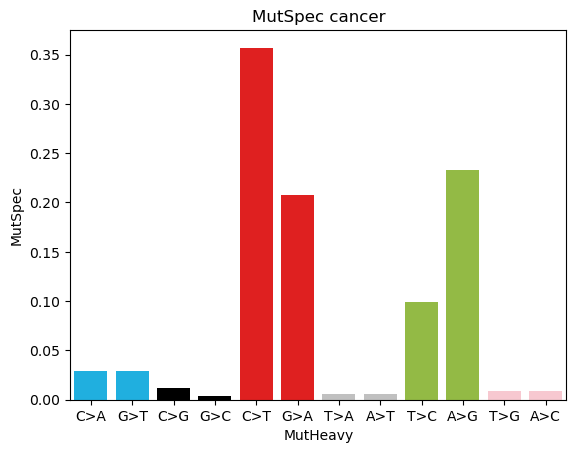

In [57]:
sns.barplot(data=observed_mut_can_all, x='MutHeavy', y='MutSpec', order=sbs12_ordered, palette=color_mapping12) \
    .set(title='MutSpec cancer')

## Sampling for cancer

In [58]:
sampling_ms_can = []
for i in range(1000):
    smlp = df_can_d_loop.sample(frac=1, replace=True)
    ms = smlp.groupby(['Mut'], as_index=False) \
    .agg({'Pos':'count'}) \
    .rename(columns={'Pos':'ObsNum'}) \
    .sort_values('Mut')
    
    ms["ExpNum"] = ms["Mut"].str[0]
    ms["ExpNum"] = ms["ExpNum"].replace(expect_num)

    ms['MutSpec'] = ms["ObsNum"] / ms["ExpNum"]
    ms["MutSpec"] = ms["MutSpec"] / ms["MutSpec"].sum()

    ms["MutHeavy"] = ms["Mut"].str.translate(complementator)
    
    sampling_ms_can.append(ms)

In [59]:
df_sampling_can = pd.concat(sampling_ms_can)

[Text(0.5, 1.0, 'MutSpec boot cancer')]

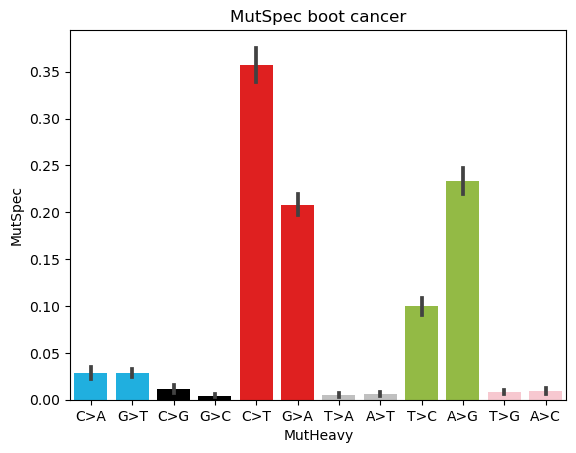

In [60]:
sns.barplot(data=df_sampling_can, x='MutHeavy', y='MutSpec', order=sbs12_ordered, palette=color_mapping12, ci='sd') \
    .set(title='MutSpec boot cancer')